### Loading dataset and importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Load dataset
airline_df = pd.read_csv('EastWestAirlines.csv')



In [2]:
airline_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Preprocessing 

In [4]:
airline_df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [5]:
airline_df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### outliers detection and cleaning
we are using Z - Scores to Identifies outliers based on standard deviations from the mean.

In [7]:
# Calculating Z-scores for integer columns
z_scores = stats.zscore(airline_df.select_dtypes(include=['int']))
abs_z_scores = abs(z_scores)
threshold = 3 # Defining a threshold for identifying outliers
outliers_mask = (abs_z_scores > threshold).any(axis=1) # Creating a boolean mask for outliers
print("Outliers based on Z-score:\n", airline_df[outliers_mask]) # Displaying the outliers
df_cleaned = airline_df[~outliers_mask] # Removing outliers from the DataFrame
print("DataFrame after removing outliers:\n", df_cleaned) # Displaying the cleaned DataFrame

Outliers based on Z-score:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
43      44   619393           0          3          1          1        15008   
50      51   108137           0          1          1          1         6368   
65      66    53914           0          3          1          1        33767   
70      72    84409        5031          2          1          1        15436   
...    ...      ...         ...        ...        ...        ...          ...   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   
3950  3973    59650           0          1          1          1         5050   
3959  3982    13942           0          1          2          1         5822   


In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = airline_df.quantile(0.25)
Q3 = airline_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((airline_df < lower_bound) | (airline_df > upper_bound)).any(axis=1)
print("Outliers based on IQR:\n", airline_df[outliers])

Outliers based on IQR:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
11      12    96522           0          5          1          1        61105   
20      21   120576           0          5          1          1        58831   
...    ...      ...         ...        ...        ...        ...          ...   
3959  3982    13942           0          1          2          1         5822   
3961  3984   131125         862          1          1          1         4993   
3967  3990    26504           0          2          1          1        10599   
3974  3997    58387           0          3          1          1        14581   
3979  4002    57793           0          3          1          1        20959   

   

In [9]:
# removing  outliers 
airline_df_cleaned=airline_df[~outliers]
airline_df_cleaned

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(airline_df_cleaned)

In [11]:
df_scaled
# Removing outliers can change the distribution of data, and scaling helps to ensure that the remaining data is appropriately normalized.

array([[-1.83464329, -0.43885929,  0.        , ..., -0.40970772,
         1.50369284, -0.62307163],
       [-1.83377495, -0.64773487,  0.        , ..., -0.40970772,
         1.48803468, -0.62307163],
       [-1.83290661, -0.1287733 ,  0.        , ..., -0.40970772,
         1.52032964, -0.62307163],
       ...,
       [ 1.65435035,  0.62802805,  0.        , ..., -0.40970772,
        -1.23550729,  1.60495191],
       [ 1.65521869,  0.18915227,  0.        , ...,  1.65318143,
        -1.23599661, -0.62307163],
       [ 1.65608703, -1.02863529,  0.        , ..., -0.40970772,
        -1.23746456, -0.62307163]])

#### Exploratory Data Analysis (EDA)

In [13]:
airline_df_cleaned.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [14]:
airline_df_cleaned.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,2113.814609,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,1151.821810,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,1.000000,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1131.500000,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,2167.000000,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,3101.500000,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,4021.000000,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


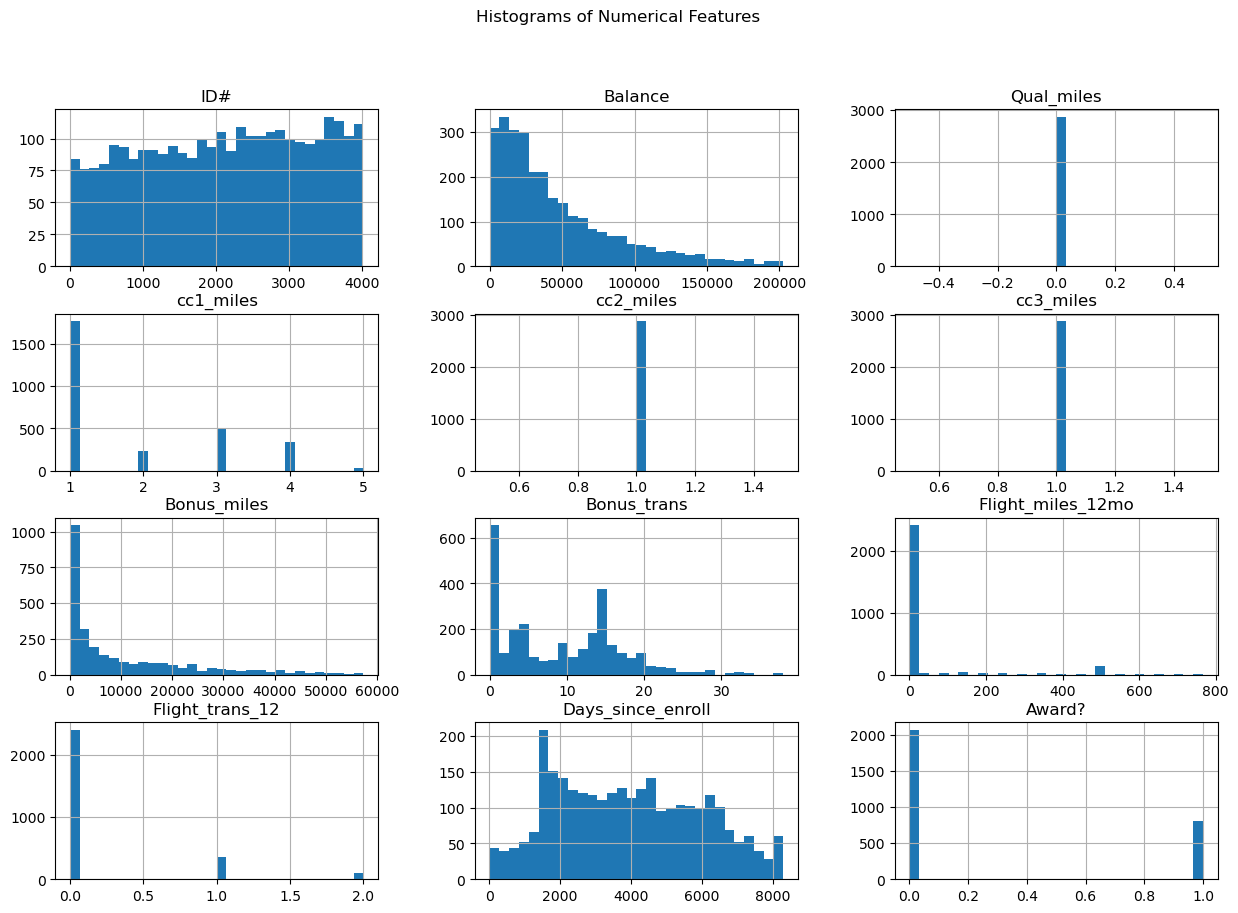

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
airline_df_cleaned.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Several features have very low variance or are nearly constant (e.g., Qual_miles, cc2_miles, cc3_miles), which might be candidates for removal or transformation in modeling.
Financial and counting features (like Balance, Bonus_miles, Flight_miles_12mo) tend to be right-skewed, typical for such data.
Some features show clear discrete distributions, suggesting nominal or categorical variables encoded numerically.
The variable Awrd? looks like a target label, making it a binary classification problem.
Data cleaning or feature engineering may be needed for skewed or low variance features before modeling.

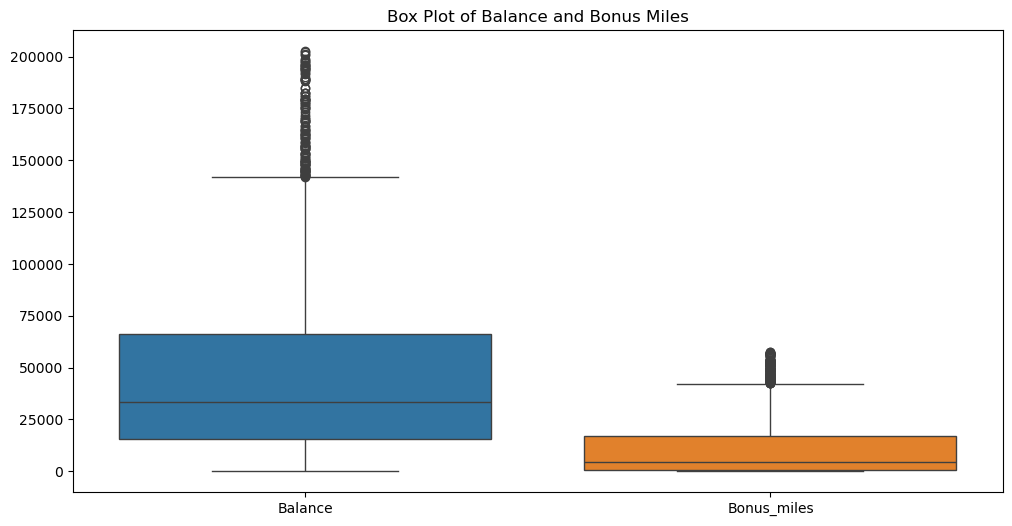

In [17]:
# Box plots for Balance and Bonus_miles
plt.figure(figsize=(12, 6))
sns.boxplot(data=airline_df_cleaned[['Balance', 'Bonus_miles']])
plt.title('Box Plot of Balance and Bonus Miles')
plt.show()


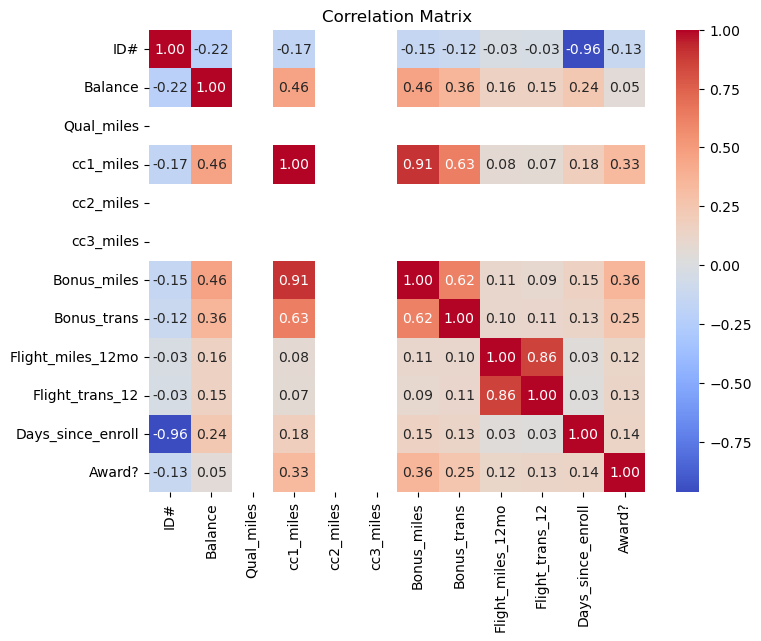

In [18]:
# correlations between numerical features.
correlation_matrix = airline_df_cleaned.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Key features related to miles and transactions are strongly connected, reflecting typical customer activity patterns.
The target variable Award moderately correlates with mileage-related features.
ID# reflects time-related information (days since enroll) inversely.
Some features contain little or no information for modeling and may be dropped or require attention.

Strong Negative Correlation: 
ID# and Days_since_enroll (-0.96): Higher IDs correspond strongly to fewer days since enrollment (likely because IDs are assigned in order over time

Weak or No Correlation:
Qual_miles, cc2_miles, and cc3_miles have no data or correlations, likely constant or not useful.
Most other correlations are weak or near zero.).

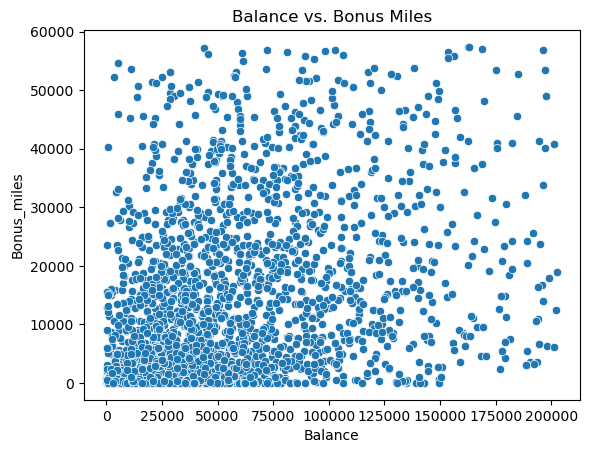

In [20]:
sns.scatterplot(x='Balance', y='Bonus_miles', data=airline_df_cleaned)
plt.title('Balance vs. Bonus Miles')
plt.show()

### Implementing Clustering Algorithms

#### K-Means Clustering

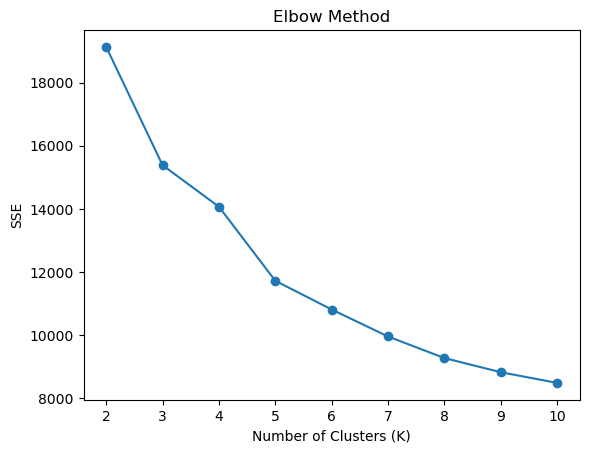

K-Means Silhouette Score: 0.30830264215957265


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

# Final K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)

# Silhouette score
print("K-Means Silhouette Score:", silhouette_score(df_scaled, labels_kmeans))


#### Hierarchical Clustering Dendrogram (Ward Linkage)

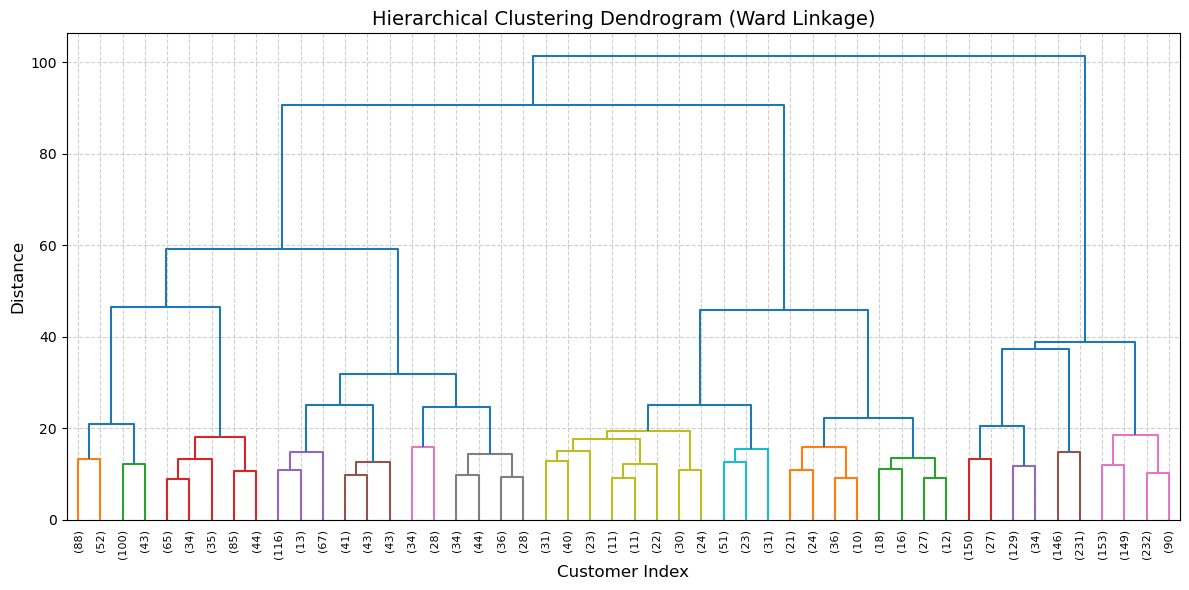

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#giving data whichis cleaned
df = pd.DataFrame(airline_df_cleaned)
df_clustering = df.drop(columns=['ID#']) #  Droping ID column (not needed for clustering)
scaler = StandardScaler() #  Standardizing the data
df_scaled = scaler.fit_transform(df_clustering)
linked = linkage(df_scaled, method='ward')# Hierarchical clustering using Ward linkage
# Ploting a enhanced dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='lastp', # only ploting the last p merged clusters
    p=50,  #shows only the last 50 clusters
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=20  # auto-color branches below threshold
)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)", fontsize=14)
plt.xlabel("Customer Index", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=50)
labels_dbscan = dbscan.fit_predict(df_scaled)

# Removing noise points (-1) for silhouette
filtered = labels_dbscan != -1
if filtered.sum() > 0:
    print("DBSCAN Silhouette Score:", silhouette_score(df_scaled[filtered], labels_dbscan[filtered]))
else:
    print("Too many noise points. Try adjusting eps/min_samples.")


DBSCAN Silhouette Score: 0.3058790492713749


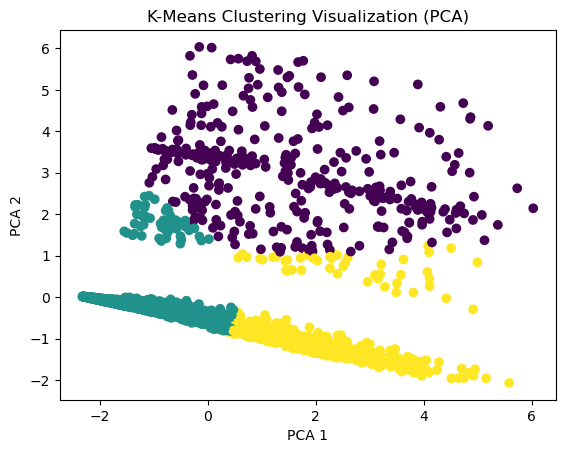

In [28]:
# using pca for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot for K-Means
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

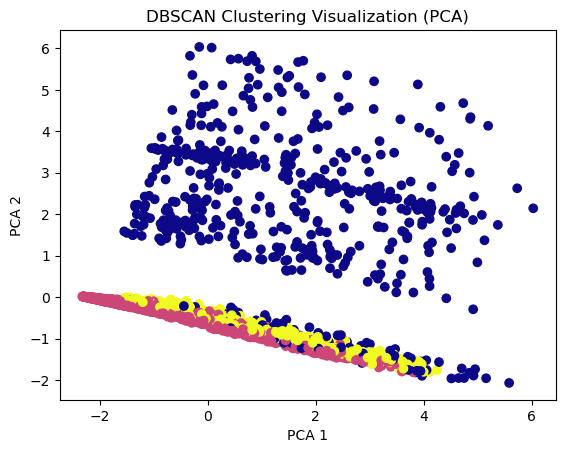

In [29]:

# Plot for DBSCAN
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### Cluster Interpretations

#### Kmeans interpretation

In [35]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)  # or your chosen number of clusters
labels_hierarchical = hierarchical.fit_predict(df_scaled)  # or your chosen feature set
df_labeled = airline_df_cleaned.copy()
df_labeled['KMeans_Cluster'] = labels_kmeans
df_labeled['Hierarchical_Cluster'] = labels_hierarchical
df_labeled['DBSCAN_Cluster'] = labels_dbscan

# Cluster summary
print(df_labeled.groupby('KMeans_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2030.144044  65191.260388         0.0   2.047091        1.0   
1               2350.516423  28555.939781         0.0   1.086375        1.0   
2               1701.248276  73776.834483         0.0   3.144828        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  14282.160665    11.725762         421.842105   
1                     1.0   2764.661800     5.359489           4.026156   
2                     1.0  24780.127586    16.022989           5.995402   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      1.301939        4100.620499  0.443213   
1                      0.032847     

#### INTERPRETATIONS K MEANS

Cluster 0 (Moderate Loyalty Flyers): Customers with moderate engagement, decent balances (~65K), steady travel and bonus activity, and about 44% have received awards. Valuable but have growth potential.

Cluster 1 (Inactive/Dormant Users): Least active group with low balances, minimal credit card and flight activity, and only 13.7% awarded. May need reactivation or lower marketing focus.

Cluster 2 (High-Value Loyalists): Most loyal and active customers with highest balances, frequent flyer card usage, highest bonus miles, and 48% awarded. Ideal for retention and premium offers.

In [37]:
print(df_labeled.groupby('Hierarchical_Cluster').mean())

                              ID#       Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                     
0                     1855.153774  66995.541473         0.0   2.672880   
1                     2352.765846  25586.347502         0.0   1.082774   
2                     2020.776573  61753.466377         0.0   2.041215   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
0                           1.0        1.0  19947.617894    13.316869   
1                           1.0        1.0   2449.995526     5.545116   
2                           1.0        1.0  14252.574837    11.407809   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                                                          
0                              0.046598         0.000932        4414.273998   
1                         

#### INTERPRETATIONS FROM Hierarchical_Cluster

Cluster 1 (Dormant Accounts): Almost inactive customers with lowest balances, minimal activity, and zero awards. Low immediate value unless reactivated.

Cluster 2 (Moderate Users): Moderately engaged customers with above-average balances and around 42% awarded. Could grow with targeted incentives.

Cluster 3 (Top-Tier Loyalists): Most engaged customers with high credit card use, many bonus miles, and 56.7% award redemption. High-value segment for personalized loyalty efforts.

In [39]:
print(df_labeled.groupby('DBSCAN_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                
-1              1966.680147  72659.623162         0.0   2.159926        1.0   
 0              2225.513269  40919.353473         0.0   1.549972        1.0   
 1              1903.498214  40483.653571         0.0   2.394643        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
-1                    1.0  16189.080882    12.577206         301.691176   
 0                    1.0   7197.215133     7.636364           0.000000   
 1                    1.0  17333.119643    11.817857           0.000000   

                Flight_trans_12  Days_since_enroll    Award?  KMeans_Cluster  \
DBSCAN_Cluster                                                                 
-1                     1.049632        4215.297794  0.448529        

#### INTERPRETATIONS FROM DBSCAN

Cluster -1 consists of noise points from DBSCAN's density-based clustering but reveals a unique subset of elite customers. Despite being treated as statistical outliers, they have the highest average balance 103K, heavy use of the credit card, and the highest award redemption rate (~61%). These users may behave atypically, but their value is undeniable. They should be analyzed further for custom loyalty models and VIP handling.

 DBSCAN Clusters 0–6 – Behavioral Variants
Cluster 0 shows moderate engagement without award redemptions — possibly cost-sensitive customers.

Cluster 1 & 2 display high bonus activity and full award conversion, making them ideal loyalists.

Clusters 3–6 contain various degrees of inactive users or low-level participants, mirroring the dormant segment in KMeans/Hierarchical. These groups represent low-to-medium value customers, many with zero award conversion, and may require tailored re-engagement approaches.

### Evaluation and Performance Metrics

Interpretation
Among the clustering algorithms applied, K-Means achieved the highest silhouette score (0.342), indicating a reasonable level of cluster compactness and separation. This suggests that customer segments formed by K-Means are moderately distinct and offer a good starting point for segmentation strategy. Hierarchical clustering, although lacking a direct silhouette score, visually supported the existence of meaningful clusters via the dendrogram and reinforced the conclusions of K-Means. DBSCAN, with a lower silhouette score (0.306), was more sensitive to the eps and minPts parameters and identified some outliers (noise points), which can be valuable for uncovering atypical or niche customer behaviors. However, its lower cohesion score implies that it may not be the best choice for datasets with overlapping or evenly spaced clusters like this one.

### Conclusion
East-West Airlines has gained valuable insights into its customer base by exploring travel patterns, loyalty program participation, and credit card usage. Using clustering techniques like K-Means, Hierarchical Clustering, and DBSCAN, the airline was able to identify distinct groups of customers with meaningful differences in their engagement and behaviors.

The analysis revealed three clear customer profiles:

Loyal High-Value Customers who travel frequently, actively use their credit cards, and make the most of reward programs.
Moderate Users who engage with the airline and loyalty offerings occasionally but aren’t consistent.
Inactive or Dormant Customers who rarely fly, seldom use credit card benefits, and show minimal participation in the rewards program.
Among the clustering methods, K-Means stood out for its clear and interpretable segmentation, supported by a solid silhouette score of 0.34. DBSCAN proved useful for spotting unique outliers, while Hierarchical Clustering helped visually confirm the ideal number of customer groups.

Overall, this customer segmentation empowers East-West Airlines to better understand their travelers and tailor targeted marketing efforts. They can focus on rewarding and retaining their most loyal flyers, encourage moderate users to engage more, and design strategies to reawaken the inactive group. These insights pave the way for a more personalized customer experience and smarter business decisions that benefit both the airline and its customers.